In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pymongo import MongoClient
from spacy.en import English
import spacy

In [3]:
import textacy

In [7]:
text = "My favourite team is Barcelona FC. They are great. I love them. Team is best."

In [8]:
doc = textacy.Doc(text)

In [9]:
list(textacy.extract.words(doc))

[favourite, team, Barcelona, FC, great, love, Team, best]

In [7]:
from nltk import word_tokenize

In [16]:
nlp = English()

In [9]:
text = 'At eight o\'clock on Thursday morning Arthur didn\'t feel very good. This was the worst possibility ever in my life. Let\'s go to houses. This was hawkish. Good, better, best.'

In [10]:
for span in nlp(text):
    lemma = span.lemma_
    if span.pos_ in ["NOUN", "PROPN", "ADJ", "VERB"] and not span.lemma_ == '-PRON-':
        print('+++ ' + lemma)
    else:
        print('--- ' + lemma)

--- at
--- eight
+++ o'clock
--- on
+++ thursday
+++ morning
+++ arthur
+++ do
--- not
+++ feel
--- very
+++ good
--- .
--- this
+++ be
--- the
+++ bad
+++ possibility
--- ever
--- in
--- -PRON-
+++ life
--- .
+++ let
--- 's
+++ go
--- to
+++ house
--- .
--- this
+++ be
+++ hawkish
--- .
+++ good
--- ,
+++ good
--- ,
+++ good
--- .


In [11]:
from pprint import pprint
pprint(word_tokenize(text))

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.',
 'This',
 'was',
 'the',
 'worst',
 'possibility',
 'ever',
 'in',
 'my',
 'life',
 '.',
 'Let',
 "'s",
 'go',
 'to',
 'houses',
 '.',
 'This',
 'was',
 'hawkish',
 '.',
 'Good',
 ',',
 'better',
 ',',
 'best',
 '.']


In [12]:
client = MongoClient('localhost', 27017)
db = client.python_import
collection = db.tickers

In [13]:
tickers = pd.DataFrame(list(collection.find()))

In [14]:
tickers.head()

,_id,group,ticker
0,595a2cde3740f51bc4c76c4e,NASDAQ,AAL
1,595a2cdf3740f51bc4c76c4f,NASDAQ,AAPL
2,595a2cdf3740f51bc4c76c50,NASDAQ,ADBE
3,595a2cdf3740f51bc4c76c51,NASDAQ,ADI
4,595a2cdf3740f51bc4c76c52,NASDAQ,ADP


In [15]:
tickers['Letter'] = tickers['ticker'].apply(lambda row: row[0])

In [16]:
tickers.head()

,_id,group,ticker,Letter
0,595a2cde3740f51bc4c76c4e,NASDAQ,AAL,A
1,595a2cdf3740f51bc4c76c4f,NASDAQ,AAPL,A
2,595a2cdf3740f51bc4c76c50,NASDAQ,ADBE,A
3,595a2cdf3740f51bc4c76c51,NASDAQ,ADI,A
4,595a2cdf3740f51bc4c76c52,NASDAQ,ADP,A


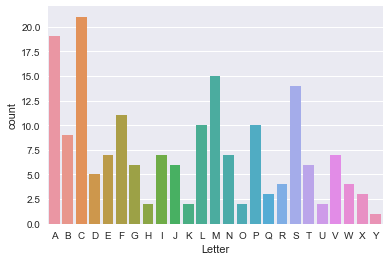

In [17]:
sns.countplot(tickers['Letter'])

In [18]:
len(tickers)

183

In [47]:
a = nlp('My nail on my finger. The finger is on my hand and arm. This nail is made from flesh.')
b = nlp('The heavy iron nail is in the wall. The wall is part of the building. This nail is made from iron.')

In [55]:
a[1].similarity(b[3])

0.99999985798866953

In [56]:
a[1].cluster

2485

In [57]:
b[3].cluster

2485